# GWU Data Science September Datathon

## import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\prana\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# EDA analysis

## import datasets

In [2]:

noaa_96=pd.read_excel('NOAA Data (1950-1996).xlsx')
noaa_21=pd.read_excel('NOAA Data (1997-2021).xlsx')

noaa=pd.concat([noaa_96,noaa_21],ignore_index=True) # main dataset which contains target = 'DAMAGE_PROPERTY'

surfacetemp=pd.read_csv('EPA Earth Surface temperature (1900-2020)1.csv') # surface temperature dataset

greenhouse=pd.read_csv('EPA Greenhouse Gas Emissions (1990-2019)1.csv') # greenhouse gases emission dataset

frozenlake=pd.read_csv('EPA Lake Ice Readings (1850-2019)1.csv') # frozen lakes temperatures dataset

precipitation=pd.read_csv('EPA Precipitation (1901-2020)1.csv') # precipitaion anomaly dataset

sealevel=pd.read_csv('EPA Sea Level Readings (1880-2020)1.csv') # sealevel changes dataset
# take CSIRO values of sealevel untill 1992, after that take NOAA values
newsealevel=pd.Series(pd.concat([sealevel[sealevel['Year']<=1992]['CSIRO - Adjusted sea level (inches)'],sealevel[sealevel['Year']>1992]['NOAA - Adjusted sea level (inches)']]))


seasonal_temp=pd.read_csv('EPA seasonal-temperature(1896-2020)1.csv') # seasonal temerature dataset

unusual=pd.read_csv('EPA Unusual High and Low Temps (1910-2020)1.csv') # unusual temperature trends dataset

### *Modified all the datasets by manually deleting the first few lines in Excel

## plots of various datasets

In [3]:
'''
use below function to plot rolling mean and rolling variances
arguments needed to be given : time, column, columnname
'''
def rolling_cal1(time,in1,yax):
    col1=pd.Series(in1)
    dummy_mean=[]
    for i in range(col1.size):
        dummy_mean.append(np.mean( col1.head(i) ))

    plt.figure(figsize=(15,8))
    plt.plot(time,dummy_mean,label=yax)
    plt.legend()
    plt.grid()
    plt.xlabel('time')
    plt.xticks(rotation=90)
    plt.ylabel(f'{yax}')
    plt.title(f'{yax} vs time rolling mean')
    plt.show()


## Plot of Surface temperature in F, 1900-2020

C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


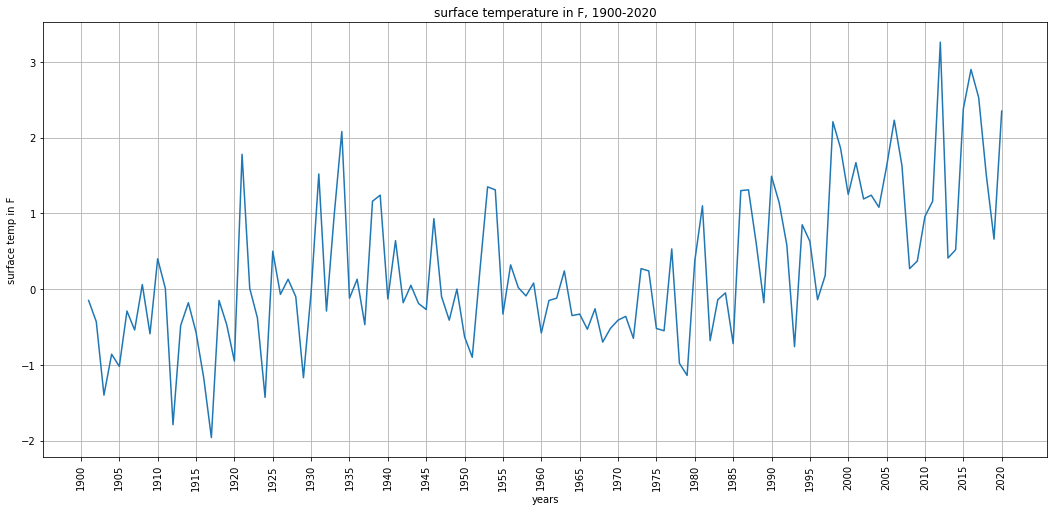

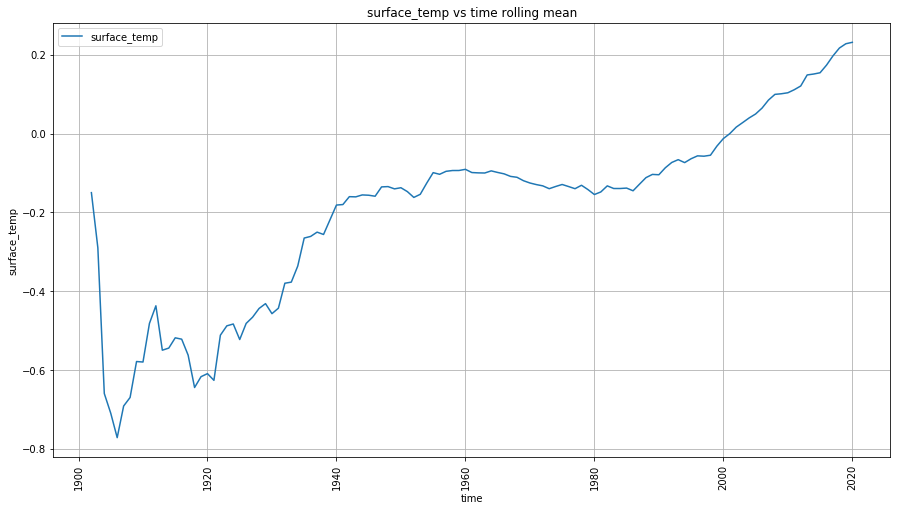

In [4]:
# surface temp plot

plt.figure(figsize=(18,8))
plt.plot(surfacetemp.iloc[:,0],surfacetemp.iloc[:,1])
plt.xticks(np.arange(surfacetemp.iloc[0,0]-1, surfacetemp.iloc[-1,0]+1, 5),rotation=90)
plt.title('surface temperature in F, 1900-2020')
plt.xlabel('years')
plt.ylabel('surface temp in F')
plt.grid()
plt.show()

# surface temp rolling mean plot
rolling_cal1(surfacetemp.iloc[:,0],surfacetemp.iloc[:,1],'surface_temp')

we can observe from the plot of surface temperature that surface temperture has increased over time. This we can confirm from the plot of rolling mean of surface temperature, we can see that trend is increasing and it increases more steeply after 1980.  
## Plot of greehouse gas emissions in metric tonnes, 1990-2019

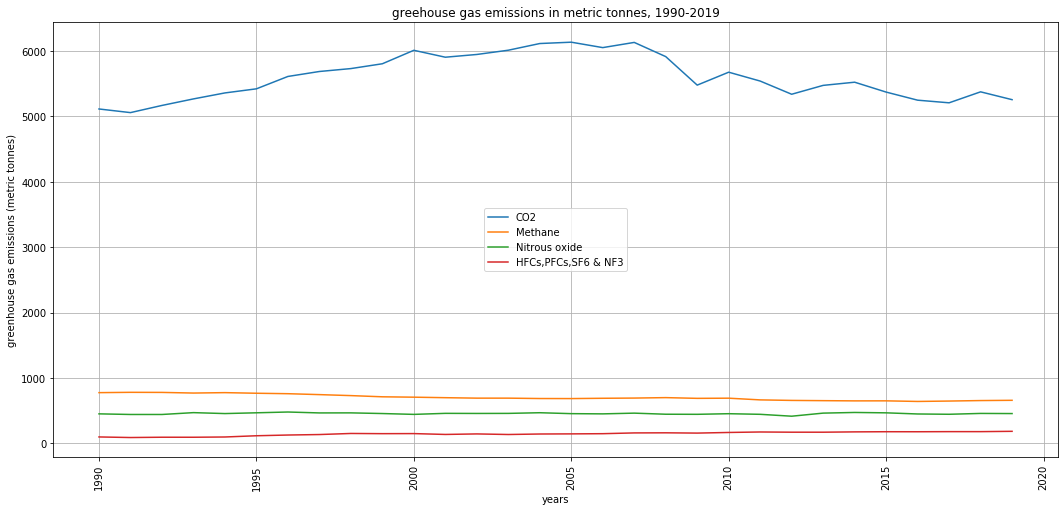

In [5]:
# green house emissions plot

plt.figure(figsize=(18,8))
plt.plot(greenhouse.Year,greenhouse['Carbon dioxide'],label='CO2')
plt.plot(greenhouse.Year,greenhouse['Methane'],label='Methane')
plt.plot(greenhouse.Year,greenhouse['Nitrous oxide'],label='Nitrous oxide')
plt.plot(greenhouse.Year,greenhouse.iloc[:,4],label='HFCs,PFCs,SF6 & NF3')
plt.xticks(rotation=90)
plt.title('greehouse gas emissions in metric tonnes, 1990-2019')
plt.xlabel('years')
plt.ylabel('greenhouse gas emissions (metric tonnes)')
plt.legend(loc='center')
plt.grid()
plt.show()

We can observe from the greenhouse gas emissions plot that, CO2 has the highest emissions, followed by Methane, Nitrous oxide, (HFCs, PFCs, SF6 & NF3). We can observe that CO2 emissions increases from 1991 steadly till 2000, stays in the same plateau till around 2007 and decreases till 2019. There is not much change in other greenhouse gases emissions from 1990-2019,i.e; they are maintaining about same amount emissions all the years.  

### Frozenlakes temperatures vs years plots

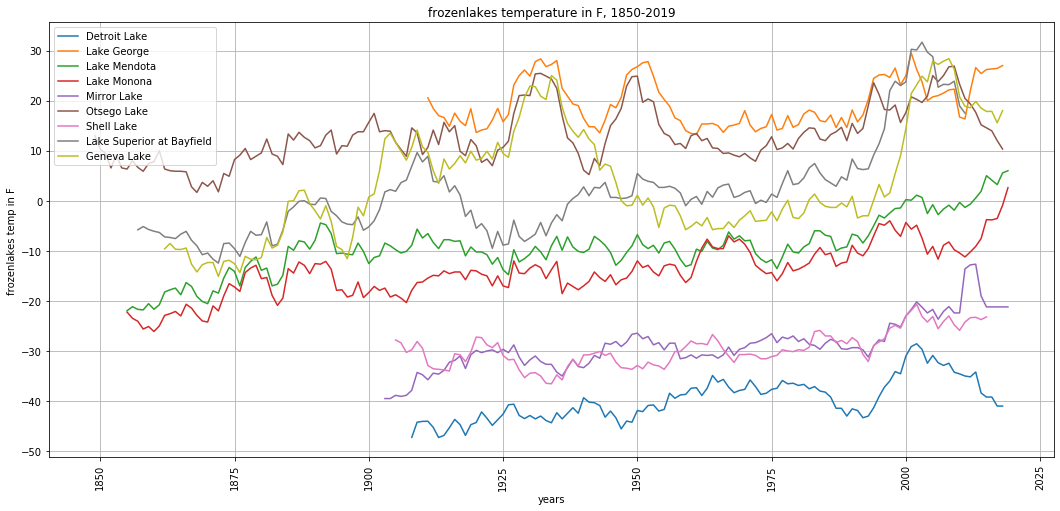

In [6]:
# frozen lakes plot

frozencols=frozenlake.columns
plt.figure(figsize=(18,8))
for i in frozencols[1:]:
    plt.plot(frozenlake['Year'],frozenlake[i],label=i)
plt.xticks(rotation=90)
plt.title('frozenlakes temperature in F, 1850-2019')
plt.xlabel('years')
plt.ylabel('frozenlakes temp in F')
plt.grid()
plt.legend()
plt.show()

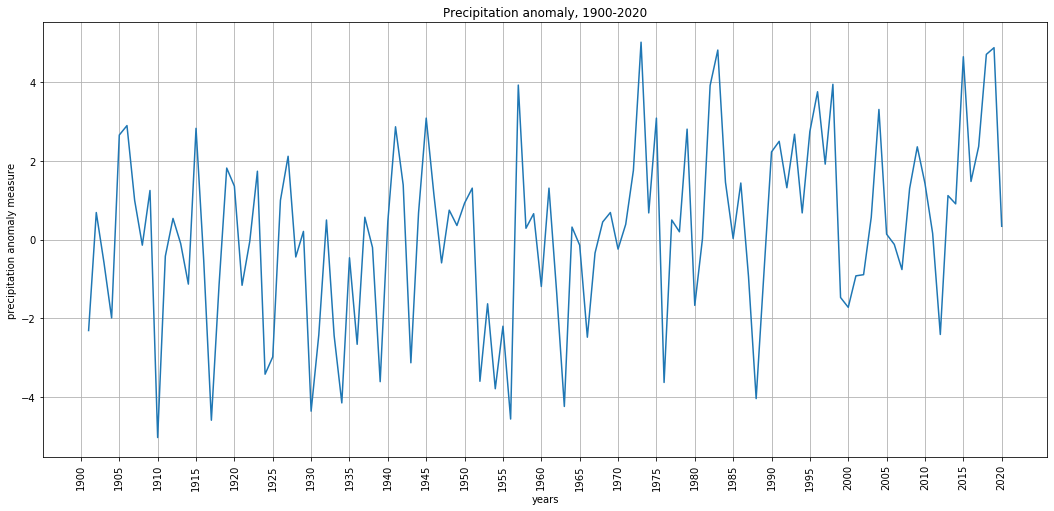

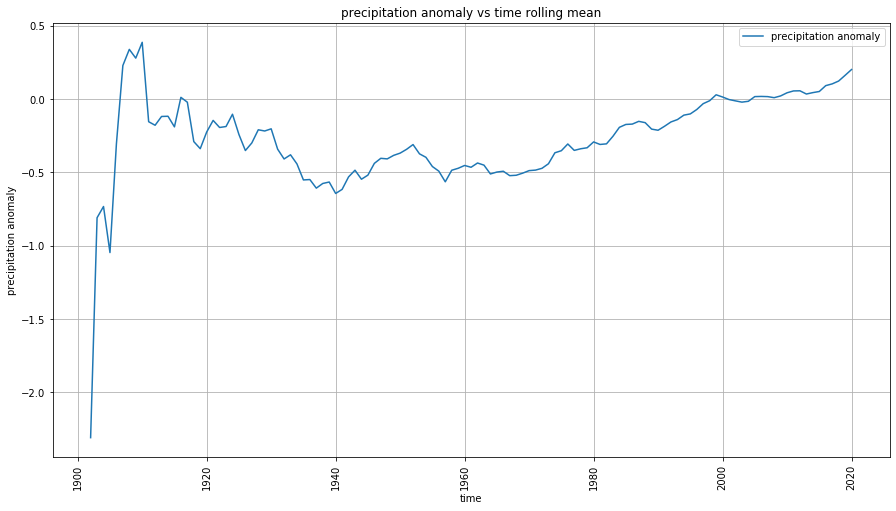

In [7]:
# precipitation plots

plt.figure(figsize=(18,8))
plt.plot(precipitation.iloc[:,0],precipitation.iloc[:,1])
plt.xticks(np.arange(precipitation.iloc[0,0]-1, precipitation.iloc[-1,0]+1, 5),rotation=90)
plt.title('Precipitation anomaly, 1900-2020')
plt.xlabel('years')
plt.ylabel('precipitation anomaly measure')
plt.grid()
plt.show()

# precipitation rolling mean plots
rolling_cal1(precipitation.iloc[:,0],precipitation.iloc[:,1],'precipitation anomaly')

Since the lineplot of precipitation anomaly random we use rolling mean plot to find the trend. From the rolling mean plot we can observe that from 1910 - 1960, the average rain was negative i.e; there was very less rain in USA. From 1960 we can see that trend steadily increased and crossed to positve average from 2000 onwards.  

### sealevel plot

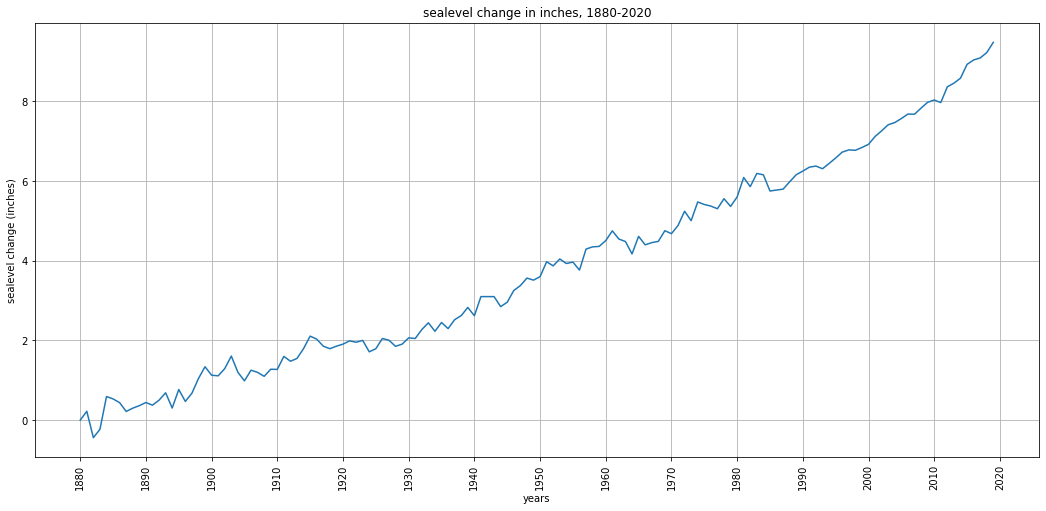

In [8]:
# sealevel plot

plt.figure(figsize=(18,8))
plt.plot(sealevel.iloc[:,0],newsealevel)
plt.xticks(np.arange(sealevel.iloc[0,0], sealevel.iloc[-1,0]+2, 10),rotation=90)
plt.title('sealevel change in inches, 1880-2020')
plt.xlabel('years')
plt.ylabel('sealevel change (inches)')
plt.grid()
plt.show()


From the sealevel plot we can observe that the sealevel has clear increasing trend and also we can see that the increase is slight steeper after 1990. From 1990-2019 (29 years) sealevel has incresed close to 3.8 inches, previously to get that much change it took 70 years.  

### seasonal temperature plot

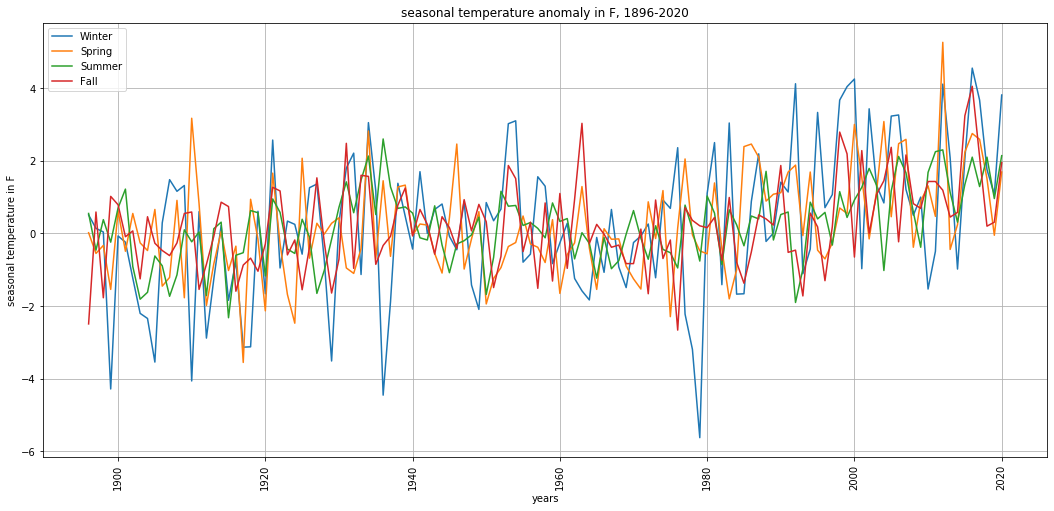

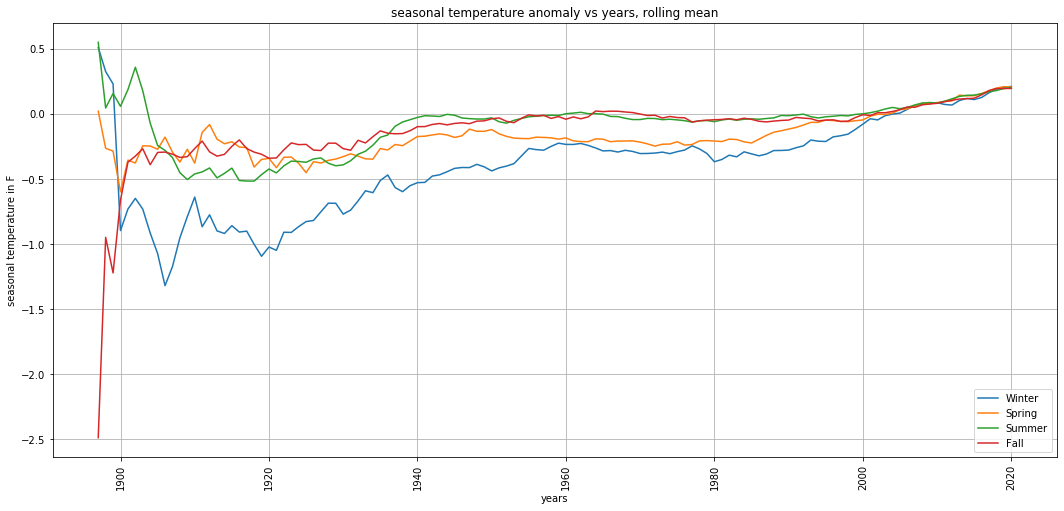

In [9]:
# seasonal temperature plot

seasonal_tempcols=seasonal_temp.columns
plt.figure(figsize=(18,8))
for i in seasonal_tempcols[1:]:
    plt.plot(seasonal_temp['Year'],seasonal_temp[i],label=i)
plt.xticks(rotation=90)
plt.title('seasonal temperature anomaly in F, 1896-2020')
plt.xlabel('years')
plt.ylabel('seasonal temperature in F')
plt.grid()
plt.legend()
plt.show()

# seasonal temperature rolling mean plot
plt.figure(figsize=(18,8))
for i in seasonal_tempcols[1:]:
    dummy_mean=[]
    for j in range(seasonal_temp[i].size):
        dummy_mean.append(np.mean( seasonal_temp[i].head(j) ))
    plt.plot(seasonal_temp['Year'],dummy_mean,label=i)
plt.xticks(rotation=90)
plt.title('seasonal temperature anomaly vs years, rolling mean')
plt.xlabel('years')
plt.ylabel('seasonal temperature in F')
plt.grid()
plt.legend()
plt.show()

From the rolling mean plot of seasonal temperature anomaly we can observe that temperature in all the seasons has been increasing more from 2000-2020

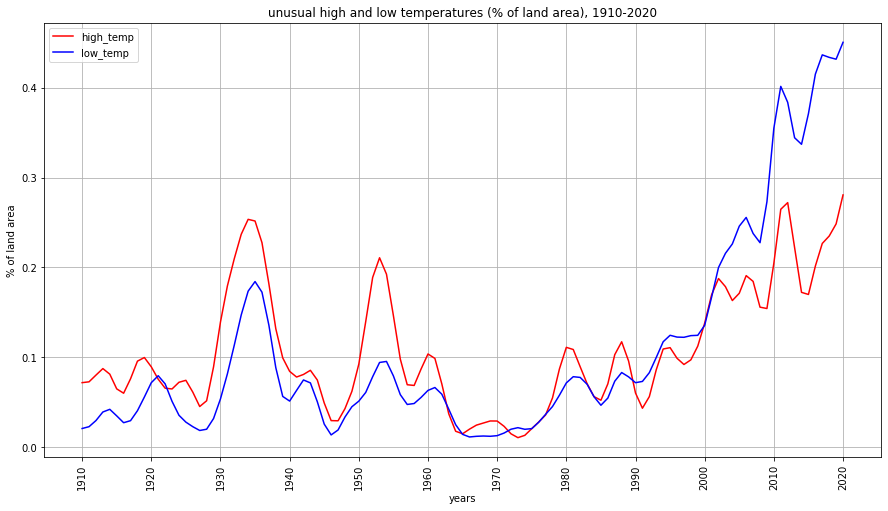

In [10]:
# unusual highs and lows temperatures plot

plt.figure(figsize=(15,8))
plt.plot(unusual.iloc[:,0],unusual.iloc[:,2],label='high_temp',color='r')
plt.plot(unusual.iloc[:,0],unusual.iloc[:,4],label='low_temp',color='b')
plt.xticks(np.arange(unusual.iloc[0,0], unusual.iloc[-1,0]+2, 10),rotation=90)
plt.title('unusual high and low temperatures (% of land area), 1910-2020')
plt.xlabel('years')
plt.ylabel('% of land area')
plt.grid()
plt.legend()
plt.show()

From the above graph we can observe that from 2000-2020 there is steep increase in the % of land that recorded unusual low temperature per year. Also there is increase in the % of land that recorded unusual high temperature per year in the same period but not as much as in the case of unusual low temperature.  

### number of nulls in the dataset per column

In [11]:
print(noaa.isnull().sum())

noaa[noaa['DAMAGE_PROPERTY']==' dissipating about 7 miles east-southeast of Hennessey. F4 damage was observed on the west side of Dover where a steel-reinforced concrete building only had a few walls remaining; large vehicles were rendered apart; mobile homes frames were wrapped around tree trunks; and trees lost all their branches and most of their bark. One woman was killed inside a large frame home that collapsed. Approximately 34 mobile homes and houses were either damaged or destroyed in Dover. Outside of Dover']=0


BEGIN_YEARMONTH             0
BEGIN_DAY                   0
BEGIN_TIME                  0
END_YEARMONTH               0
END_DAY                     0
END_TIME                    0
EPISODE_ID             232239
EVENT_ID                    0
STATE                       1
STATE_FIPS                  1
YEAR                        0
MONTH_NAME                  0
EVENT_TYPE                  0
CZ_TYPE                     0
CZ_FIPS                     0
CZ_NAME                  1557
WFO                    125573
BEGIN_DATE_TIME             0
CZ_TIMEZONE                 0
END_DATE_TIME               0
INJURIES_DIRECT             0
INJURIES_INDIRECT           0
DEATHS_DIRECT               0
DEATHS_INDIRECT             0
DAMAGE_PROPERTY        444997
DAMAGE_CROPS           557683
SOURCE                 345865
MAGNITUDE              462365
MAGNITUDE_TYPE         951004
FLOOD_CAUSE           1145969
CATEGORY              1181535
TOR_F_SCALE           1123472
TOR_LENGTH             926826
TOR_WIDTH 

In [12]:
damage=[]
for i in range(noaa.shape[0]):
    if type(noaa.loc[i,'DAMAGE_PROPERTY'])==str and len(noaa.loc[i,'DAMAGE_PROPERTY'])>1:
        if noaa.loc[i,'DAMAGE_PROPERTY'][-1]=='K':
            damage.append(float(noaa.loc[i,'DAMAGE_PROPERTY'][:-1])*10**3)
        elif noaa.loc[i,'DAMAGE_PROPERTY'][-1]=='M':
            damage.append(float(noaa.loc[i,'DAMAGE_PROPERTY'][:-1])*10**6)
        elif noaa.loc[i,'DAMAGE_PROPERTY'][-1]=='B':
            damage.append(float(noaa.loc[i,'DAMAGE_PROPERTY'][:-1])*10**9)
        elif noaa.loc[i,'DAMAGE_PROPERTY'][-1] in 'Hh':
            damage.append(float(noaa.loc[i,'DAMAGE_PROPERTY'][:-1])*10**2)
    elif type(noaa.loc[i,'DAMAGE_PROPERTY'])==str and len(noaa.loc[i,'DAMAGE_PROPERTY'])<=1:
        if noaa.loc[i,'DAMAGE_PROPERTY']=='K':
            damage.append(float(1)*10**3)
        elif noaa.loc[i,'DAMAGE_PROPERTY']=='M':
            damage.append(float(1)*10**6)
        elif noaa.loc[i,'DAMAGE_PROPERTY']=='B':
            damage.append(float(1)*10**9)
        elif noaa.loc[i,'DAMAGE_PROPERTY'] in 'Hh':
            damage.append(float(1)*10**2)
    else:
        damage.append(float(noaa.loc[i,'DAMAGE_PROPERTY']))

noaa['DAMAGE_PROPERTY']=damage



using above loop we are transforming the DAMAGE_PROPERTY column into a numeric datatype and storing it as new column. Here we multiplied elements with ['K','M','B','Hh'] with [10^3,10^6,10^9,100] respectively.

In [13]:
noaa.drop(noaa[noaa['YEAR']==0].index,inplace=True) # dropping years with value 0


C:\Users\prana\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


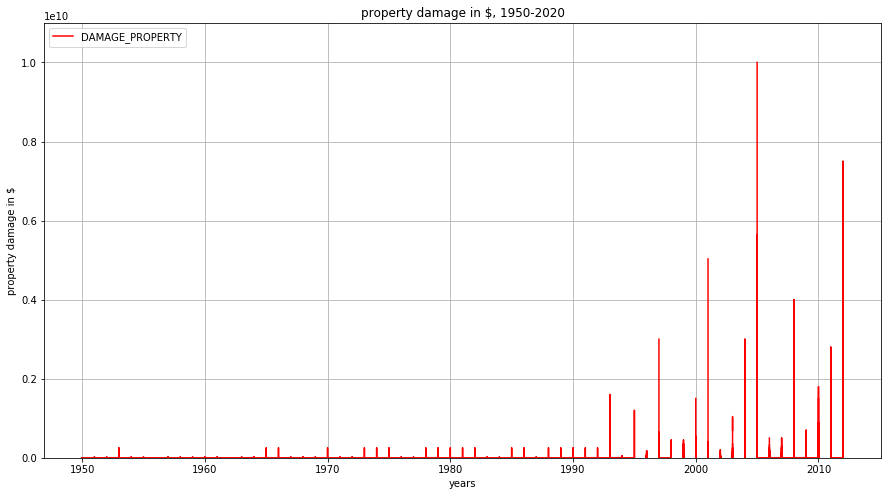

In [14]:
# damage property in $ vs years plot

plt.figure(figsize=(15,8))
plt.plot(noaa.loc[:,'YEAR'],noaa.loc[:,'DAMAGE_PROPERTY'],label='DAMAGE_PROPERTY',color='r')
plt.title('property damage in $, 1950-2020')
plt.xlabel('years')
plt.ylim([0,1.1*10**10])
plt.ylabel('property damage in $')
plt.grid()
plt.legend()
plt.show()

From the property damage vs year graph we can observe clearly that there has been more property damage in $ from 1995-2020 and reached its peak around 2005-2006 period.

In [15]:

# dropping columns with high number of nulls
noaa.drop(['DAMAGE_CROPS','SOURCE','MAGNITUDE','MAGNITUDE_TYPE','FLOOD_CAUSE',
           'CATEGORY','TOR_F_SCALE','TOR_LENGTH','TOR_WIDTH','TOR_OTHER_WFO',
           'TOR_OTHER_CZ_STATE','TOR_OTHER_CZ_FIPS','TOR_OTHER_CZ_NAME','EVENT_NARRATIVE','EPISODE_NARRATIVE',
           'BEGIN_RANGE','BEGIN_AZIMUTH','BEGIN_LOCATION','END_RANGE','END_AZIMUTH',
           'END_LOCATION','BEGIN_LAT','BEGIN_LON',
           'END_LAT','END_LON'],axis=1,inplace=True)

# dropping columns which have no effect on target

noaa.drop(['BEGIN_YEARMONTH','BEGIN_DAY','BEGIN_TIME','END_YEARMONTH','END_DAY','END_TIME',
           'EPISODE_ID','EVENT_ID','STATE','CZ_TYPE','CZ_NAME','BEGIN_DATE_TIME','END_DATE_TIME',
           'INJURIES_DIRECT','INJURIES_INDIRECT','DEATHS_DIRECT','DEATHS_INDIRECT','WFO',
           'DATA_SOURCE'],axis=1,inplace=True)



# noaa.drop(['WFO'],axis=1,inplace=True)
noaa.drop((noaa[noaa['DAMAGE_PROPERTY'].isnull()]).index,inplace=True) # dropping Damage of null

print('useful columns')
print(noaa.columns)


useful columns
Index(['STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_FIPS',
       'CZ_TIMEZONE', 'DAMAGE_PROPERTY'],
      dtype='object')


In [16]:


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
le=LabelEncoder()
X = noaa.loc[:, noaa.columns != 'DAMAGE_PROPERTY']
lb_cols=['STATE_FIPS', 'YEAR','MONTH_NAME', 'EVENT_TYPE','CZ_FIPS',
         'CZ_TIMEZONE']
for j in lb_cols:
    X[j]=le.fit_transform(X[j])

# target
y=noaa.loc[:, noaa.columns == 'DAMAGE_PROPERTY']

sc = StandardScaler()
y=sc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)



C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [17]:
regressor1=LinearRegression()
regressor1.fit(X_train,y_train)

y_pred=regressor1.predict(X_test)

from sklearn.metrics import r2_score
print("\n")
print("Results Using All Features: \n")
print('adj r2 =',r2_score(y_test,y_pred))




Results Using All Features: 

adj r2 = 2.9497859113214453e-05


this model is not good to predict DAMAGE_PROPERTY. The target does not have autocorrelation with 
past values so we can not use time series models. This Linear model has very adjusted r2 value.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg1 = PolynomialFeatures(degree=3)
X_poly = poly_reg1.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

y_poly_pred=pol_reg.predict(poly_reg1.fit_transform(X_test))


print('adj r2 =',r2_score(y_test,y_poly_pred))

adj r2 = 0.00013764768695678775


the polynomial regression is better model for predicting the DAMAGE_PROPERTY.


### from the EDA we can clearly say that climate change is effecting DAMAGE_PROPERTY, since the surface temperature, precipitation,sealevel all increased steeply after 1990 similar to DAMAGE_PROPERTY amount increased after 1990. So we can say that climate change is effecting DAMAGE_PROPERTY